In [1]:
import os
import numpy as np
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
subspace_struct_list=['234111','2222211','333111','441111']
num_iter=11
isi_um=np.zeros((4,4,11))
isi_ummm=np.zeros((4,4,11))
isi_mm=np.zeros((4,4,11))
aux_um=np.zeros((4,4,11))
aux_ummm=np.zeros((4,4,11))
aux_mm=np.zeros((4,4,11))

for i,ss in enumerate(subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um.mat"))
    isi_um[i,i,:] = np.squeeze(data['isi_um'])
    a = np.squeeze(data['aux_um'][1,:])
    aux_um[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","loss_um_scoff.mat"))
    # aux_um[i,i,:] = np.squeeze(data['loss'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm.mat"))
    isi_ummm[i,i,:] = np.squeeze(data['isi_ummm'])
    a = np.squeeze(data['aux_ummm'][1,:])
    aux_ummm[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","loss_ummm_scoff.mat"))
    # aux_ummm[i,i,:] = np.squeeze(data['loss'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm.mat"))
    isi_mm[i,i,:] = np.squeeze(data['isi_mm'])
    a = np.squeeze(data['aux_mm'][1,:])
    aux_mm[i,i,:] = np.array([a[k][0][0] for k in range(num_iter)])
    
    incorrect_ss_list = list(range(4))
    incorrect_ss_list.remove(i)
    for j in incorrect_ss_list:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","um.mat"))
        isi_um[i,j,:] = np.squeeze(data['isi_um_s1'])
        a = np.squeeze(data['aux_um_s1'][1,:])
        aux_um[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])
        # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","loss_um_scoff.mat"))
        # aux_um[i,j,:] = np.squeeze(data['loss'])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","ummm.mat"))
        isi_ummm[i,j,:] = np.squeeze(data['isi_ummm_s1'])
        a = np.squeeze(data['aux_ummm_s1'][1,:])
        aux_ummm[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])
        # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","loss_ummm_scoff.mat"))
        # aux_ummm[i,j,:] = np.squeeze(data['loss'])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","mm.mat"))
        isi_mm[i,j,:] = np.squeeze(data['isi_mm_s1'])
        a = np.squeeze(data['aux_mm_s1'][1,:])
        aux_mm[i,j,:] = np.array([a[k][0][0] for k in range(num_iter)])

In [8]:
isi_um_min = np.min(isi_um,axis=2)
isi_ummm_min = np.min(isi_ummm,axis=2)
isi_mm_min = np.min(isi_mm,axis=2)

isi_um_min_ind = np.argmin(isi_um,axis=2)
isi_ummm_min_ind = np.argmin(isi_ummm,axis=2)
isi_mm_min_ind = np.argmin(isi_mm,axis=2)

aux_um_min = np.min(aux_um,axis=2)
aux_ummm_min = np.min(aux_ummm,axis=2)
aux_mm_min = np.min(aux_mm,axis=2)

print(aux_um_min)
print(aux_ummm_min)
print(aux_mm_min)

aux_um_min_ind = np.argmin(aux_um,axis=2)
aux_ummm_min_ind = np.argmin(aux_ummm,axis=2)
aux_mm_min_ind = np.argmin(aux_mm,axis=2)

print(aux_um_min_ind)
print(aux_ummm_min_ind)
print(aux_mm_min_ind)

[[42.69163868 42.88364054 42.76165113 42.99218699]
 [42.64939864 42.2999005  42.85097599 42.8680394 ]
 [42.71959192 42.85787947 42.63506397 43.0995388 ]
 [43.09076913 43.23929925 43.17352401 42.9764492 ]]
[[42.67687912 42.86470472 42.75052939 43.03843311]
 [42.65588586 42.22912355 42.62781847 42.76436291]
 [42.6947989  42.86178266 42.62022519 43.04032558]
 [42.68928778 42.39724179 41.1201708  39.93684739]]
[[23.82415208 23.94737096 23.81949718 24.02788477]
 [27.76622709 27.44226515 27.80274844 28.16152244]
 [23.93111632 24.02946237 23.7786396  24.03622762]
 [17.26454813 18.66018158 17.28986256 17.5637204 ]]
[[ 7  7  7  2]
 [ 9  5  4  7]
 [ 3  7 10  4]
 [ 7  5 10 10]]
[[ 6  2 10 10]
 [ 0  7  9  5]
 [ 2  4 10  0]
 [ 6  4 10  5]]
[[ 9  3  8  3]
 [ 7 10  8 10]
 [ 5 10 10  4]
 [ 9 10  6  4]]


In [10]:
print(aux_um[:,:,0])
print(aux_ummm[:,:,0])
print(aux_mm[:,:,0])

[[43.32370593 43.23762906 43.16603209 43.30117462]
 [43.12498175 42.9946584  43.08784209 43.11540022]
 [42.98870616 43.16228337 43.09060098 43.17604276]
 [43.40195652 43.42638287 43.37184825 43.36951086]]
[[43.05648482 43.08395594 42.94922329 43.11095509]
 [42.65588586 42.55223519 42.74102252 42.82280261]
 [43.03791602 43.06117426 43.03808026 43.04032558]
 [42.85736505 42.54567468 41.52502095 40.19678841]]
[[26.25983669 26.53545753 29.50312211 26.67835153]
 [32.86375547 28.80422663 28.48176271 30.07850409]
 [30.46420786 27.15370206 29.31749442 32.40324192]
 [20.63437505 28.09314258 24.56429609 26.09833338]]


In [4]:
# use loss to grab ISI
isi_um_min_loss = np.zeros((4,4))
isi_ummm_min_loss = np.zeros((4,4))
isi_mm_min_loss = np.zeros((4,4))

for i in range(4):
    for j in range(4):
        isi_um_min_loss[i,j] = isi_um[i,j,aux_um_min_ind[i,j]]
        isi_ummm_min_loss[i,j] = isi_ummm[i,j,aux_ummm_min_ind[i,j]]
        isi_mm_min_loss[i,j] = isi_mm[i,j,aux_mm_min_ind[i,j]]

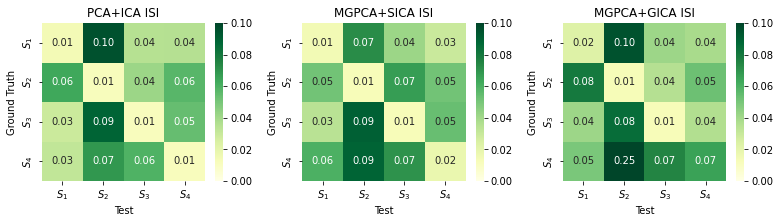

In [5]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,3,figsize=(11,3.2))

sns.heatmap(isi_um_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0])
# axes[0].set_title("UA ISI")
axes[0].set_title("PCA+ICA ISI")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(isi_ummm_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MGPCA+SICA ISI")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

sns.heatmap(isi_mm_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[2])
axes[2].set_title("MGPCA+GICA ISI")
axes[2].set_ylabel("Ground Truth")
axes[2].set_xlabel("Test")

plt.tight_layout()
plt.savefig("simulation_isi_gica.pdf")
# plt.savefig("simulation_isi_gica.png",dpi=200)

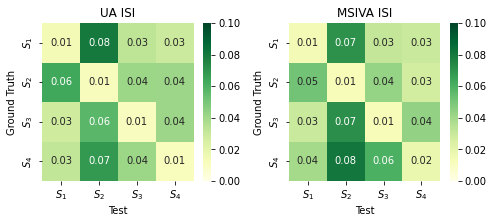

In [30]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,2,figsize=(7,3.2))

sns.heatmap(isi_um_min,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0])
axes[0].set_title("UA ISI")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(isi_ummm_min,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MSIVA ISI")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation.pdf")
# plt.savefig("simulation.png",dpi=200)

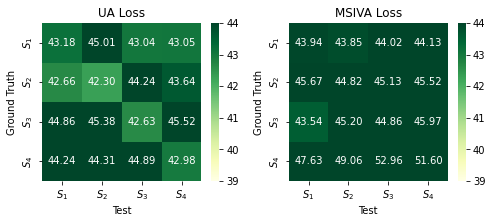

In [14]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,2,figsize=(7,3.2))
# viridis_r
sns.heatmap(aux_um_min,cmap="YlGn",annot=True,vmin=39,vmax=44,fmt=".2f",xticklabels=label,yticklabels=label,ax=axes[0])
axes[0].set_title("UA Loss")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(aux_ummm_min,cmap="YlGn",annot=True,vmin=39,vmax=44,fmt=".2f",xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MSIVA Loss")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation.pdf")
# plt.savefig("simulation_loss.png",dpi=200)

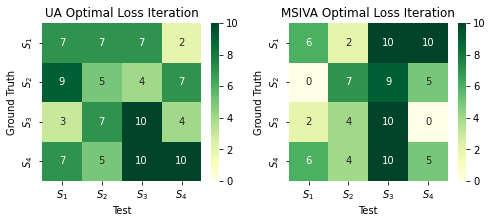

In [54]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,2,figsize=(7,3.2))
# viridis_r
sns.heatmap(aux_um_min_ind,cmap="YlGn",annot=True,vmin=0,vmax=10,xticklabels=label,yticklabels=label,ax=axes[0])
axes[0].set_title("UA Optimal Loss Iteration")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(aux_ummm_min_ind,cmap="YlGn",annot=True,vmin=0,vmax=10,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MSIVA Optimal Loss Iteration")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation_opt_iter.pdf")
# plt.savefig("simulation_opt_iter.png",dpi=200)

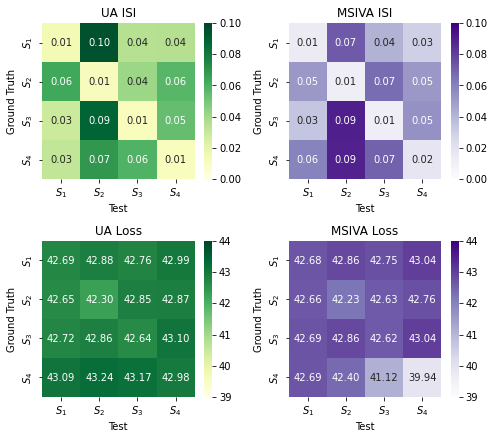

In [29]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(2,2,figsize=(7,6.2))
# viridis_r
sns.heatmap(isi_um_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0,0])
axes[0,0].set_title("UA ISI")
axes[0,0].set_ylabel("Ground Truth")
axes[0,0].set_xlabel("Test")

sns.heatmap(isi_ummm_min_loss,cmap="Purples",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0,1])
axes[0,1].set_title("MSIVA ISI")
axes[0,1].set_ylabel("Ground Truth")
axes[0,1].set_xlabel("Test")

# viridis_r
sns.heatmap(aux_um_min,cmap="YlGn",annot=True,vmin=39,vmax=44,fmt=".2f",xticklabels=label,yticklabels=label,ax=axes[1,0])
axes[1,0].set_title("UA Loss")
axes[1,0].set_ylabel("Ground Truth")
axes[1,0].set_xlabel("Test")

sns.heatmap(aux_ummm_min,cmap="Purples",annot=True,vmin=39,vmax=44,fmt=".2f",xticklabels=label,yticklabels=label,ax=axes[1,1])
axes[1,1].set_title("MSIVA Loss")
axes[1,1].set_ylabel("Ground Truth")
axes[1,1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation_isi_loss.pdf")
# plt.savefig("simulation.png",dpi=200)

In [6]:
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
subspace_struct_list=['234111','2222211','333111','441111']

corr = np.zeros((4,8,12,12))

for i,ss in enumerate(subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","A.mat"))
    A=np.squeeze(data['A'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um_W.mat"))
    W1=np.squeeze(data['W1'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm_W.mat"))
    W2=np.squeeze(data['W2'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","mm_W.mat"))
    W3=np.squeeze(data['W3'])

    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","W.mat"))
    W=np.squeeze(data['W'])

    corr[i,0] = W1[0]@A[0]
    corr[i,1] = W1[1]@A[1]
    corr[i,2] = W2[0]@A[0]
    corr[i,3] = W2[1]@A[1]
    corr[i,4] = W3[0]@A[0]
    corr[i,5] = W3[1]@A[1]
    corr[i,6] = W[0]@A[0]
    corr[i,7] = W[1]@A[1]

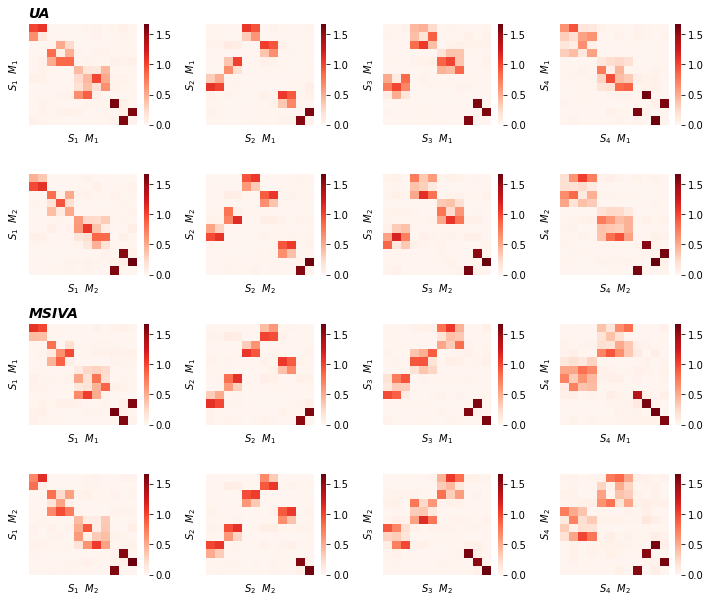

In [16]:
# cmap_list=["YlGn","YlGn","Purples","Purples"]
corrabsmax = np.max(np.abs(corr))
analysis_list = ["UA"]*2+["MSIVA"]*2
fig,axes=plt.subplots(4,4,figsize=(10,2.12*4))
for i in range(4):
    for j in range(4):
        sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=corrabsmax,ax=axes[j,i]) #Purples
        # sns.heatmap(corr[i,j],cmap="coolwarm",vmin=-corrabsmax,vmax=corrabsmax,ax=axes[j,i])
        # axes[j,i].set_title(f"{analysis_list[j]}  $S_{i+1}$  $M_{j%2+1}$")#self-correlation($Y$)
        # axes[j,i].set_axis_off()
        axes[j,i].set_xlabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_ylabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            axes[j,i].set_title("UA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 2:
            axes[j,i].set_title("MSIVA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
# plt.savefig("simulation_absWA_red.png",dpi=300)
# plt.savefig("simulation_absWA_red.pdf")

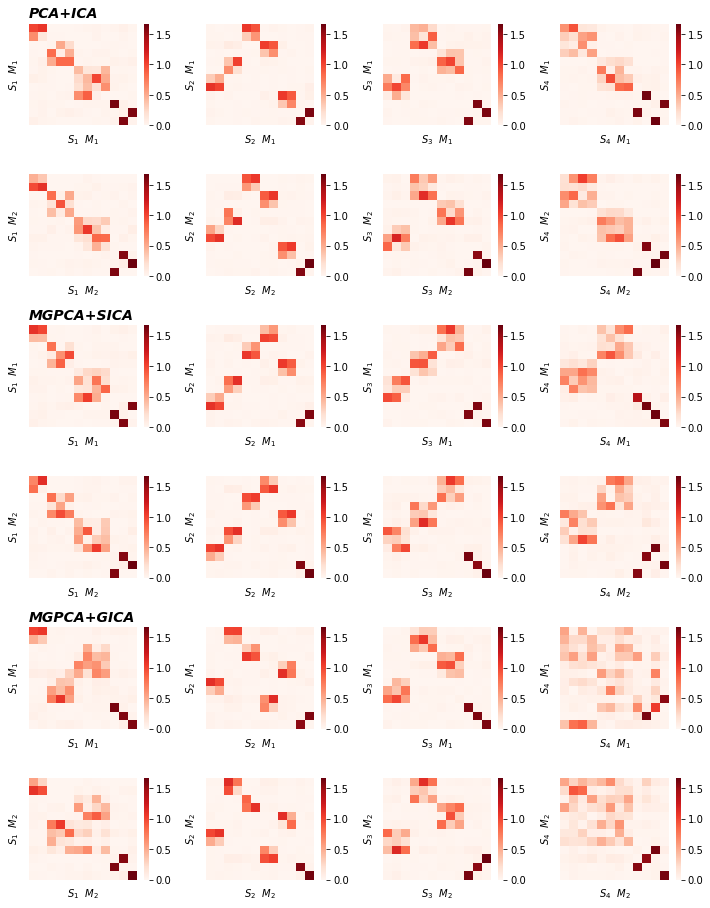

In [7]:
# cmap_list=["YlGn","YlGn","Purples","Purples"]
corrabsmax = np.max(np.abs(corr))
analysis_list = ["UA"]*2+["MSIVA"]*2+["MGPCA+GICA"]*2
fig,axes=plt.subplots(6,4,figsize=(10,2.12*6))

for i in range(4):
    for j in range(6):
        sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=corrabsmax,ax=axes[j,i]) #Purples
        # sns.heatmap(corr[i,j],cmap="coolwarm",vmin=-corrabsmax,vmax=corrabsmax,ax=axes[j,i])
        # axes[j,i].set_title(f"{analysis_list[j]}  $S_{i+1}$  $M_{j%2+1}$")#self-correlation($Y$)
        # axes[j,i].set_axis_off()
        axes[j,i].set_xlabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_ylabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            # axes[j,i].set_title("UA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
            axes[j,i].set_title("PCA+ICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 2:
            # axes[j,i].set_title("MSIVA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
            axes[j,i].set_title("MGPCA+SICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 4:
            axes[j,i].set_title("MGPCA+GICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
# plt.savefig("simulation_absWA_red_gica.png",dpi=300)
plt.savefig("simulation_absWA_gica.pdf")

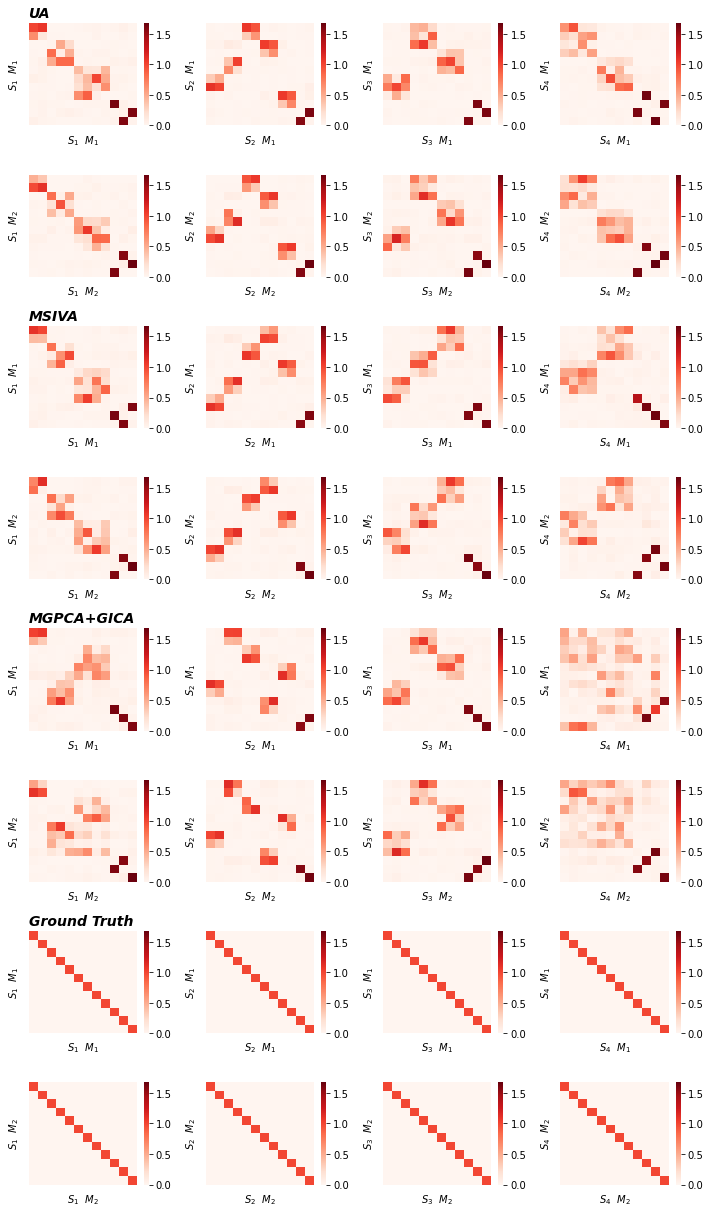

In [18]:
# cmap_list=["YlGn","YlGn","Purples","Purples"]
corrabsmax = np.max(np.abs(corr))
analysis_list = ["UA"]*2+["MSIVA"]*2+["MGPCA+GICA"]*2+["Ground Truth"]*2
fig,axes=plt.subplots(8,4,figsize=(10,2.12*8))

for i in range(4):
    for j in range(8):
        sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=corrabsmax,ax=axes[j,i]) #Purples
        # sns.heatmap(corr[i,j],cmap="coolwarm",vmin=-corrabsmax,vmax=corrabsmax,ax=axes[j,i])
        # axes[j,i].set_title(f"{analysis_list[j]}  $S_{i+1}$  $M_{j%2+1}$")#self-correlation($Y$)
        # axes[j,i].set_axis_off()
        axes[j,i].set_xlabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_ylabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            axes[j,i].set_title("UA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 2:
            axes[j,i].set_title("MSIVA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 4:
            axes[j,i].set_title("MGPCA+GICA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 6:
            axes[j,i].set_title("Ground Truth", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
# plt.savefig("simulation_absWA_red_gica_gt.png",dpi=300)
# plt.savefig("simulation_absWA_red.pdf")